In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [3]:
# Import cleaned, aggregating data

In [4]:
df = pd.read_csv("./Data/mini_finalv2.csv")

In [5]:
df.head()

,price,mean_commute_time,median_home_value,percent_bachelors_or_higher,percent_below_poverty,percent_highschool_or_higher,percent_no_health_insurance,rating,review_count,unemployment_rate,...,density,income_category,price_weight,price_weight_contr,price_weight_contrv2,zip_code,high_price,4_star,1_star,zip_code.1
0,3.000,28.1,197100.0,29.2,5.4,92.6,3.4,4.500000,2.0,6.9,...,116.4,1.0,27.000000,0.310416,15.520809,1069,1,0,0,1069
1,2.500,17.8,174600.0,28.8,9.0,90.2,2.6,4.250000,9.5,7.8,...,339.2,0.0,84.250000,0.188872,2.409936,1201,1,0,0,1201
2,1.500,23.7,152000.0,22.6,8.6,88.1,1.7,4.250000,14.5,6.5,...,135.1,0.0,98.875000,1.204471,7.461323,1220,0,0,2,1220
3,1.625,19.2,153300.0,24.4,8.8,85.2,3.5,3.589286,29.5,9.5,...,118.2,0.0,215.267857,1.382315,3.824155,1247,3,0,24,1247
4,2.000,25.8,279500.0,46.3,7.0,96.3,1.1,3.000000,14.0,5.6,...,73.5,2.0,84.000000,1.812689,12.947777,1373,0,0,0,1373


In [6]:
df.median_household_income.describe()

count      3454.000000
mean      97833.454545
std       92793.691909
min        6524.000000
25%       39074.750000
50%       59641.000000
75%      102401.250000
max      300000.000000
Name: median_household_income, dtype: float64

In [7]:
def income_map(x):
    if x <=39074.75:
        return 1
    elif x > 39074.75 and x <=59641:
        return 2
    elif x > 59641 and x <= 102401:
        return 3
    else:
        return 4

In [8]:
def income_map2(x):
    if x <=59641:
        return 1
    else:
        return 2

In [9]:
#creating 4 income categories
df["inc_cat2"] = df.median_household_income.apply(income_map)

In [10]:
#creating two income categories
df["inc_cat3"] = df.median_household_income.apply(income_map2)

In [11]:
df["inc_cat2"].value_counts()

1    864
4    864
3    863
2    863
Name: inc_cat2, dtype: int64

In [12]:
df.columns

Index(['price', 'mean_commute_time', 'median_home_value',
       'percent_bachelors_or_higher', 'percent_below_poverty',
       'percent_highschool_or_higher', 'percent_no_health_insurance', 'rating',
       'review_count', 'unemployment_rate', 'median_household_income',
       'population', 'density', 'income_category', 'price_weight',
       'price_weight_contr', 'price_weight_contrv2', 'zip_code', 'high_price',
       '4_star', '1_star', 'zip_code.1', 'inc_cat2', 'inc_cat3'],
      dtype='object')

In [13]:
df.to_csv("./Data/final_agg.csv", index = False)

In [14]:
corr = df.corr()
corr['inc_cat3'].sort_values(ascending = False)

inc_cat3                        1.000000
inc_cat2                        0.894479
income_category                 0.857180
median_household_income         0.642145
percent_bachelors_or_higher     0.430284
percent_highschool_or_higher    0.382164
median_home_value               0.366727
mean_commute_time               0.220724
price                           0.156595
rating                          0.066554
price_weight                    0.051790
review_count                    0.045981
population                      0.035331
price_weight_contr              0.026868
zip_code                        0.007283
zip_code.1                      0.007283
price_weight_contrv2            0.006476
4_star                         -0.000369
high_price                     -0.017584
density                        -0.019777
1_star                         -0.118702
percent_no_health_insurance    -0.363933
unemployment_rate              -0.370802
percent_below_poverty          -0.373598
Name: inc_cat3, 

## Modeling

In [15]:
x = df[['price_weight_contrv2', 'high_price', '4_star', 'price', 'rating', "1_star"]]
y = df["inc_cat3"]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 13)

In [17]:
models = [LogisticRegression, KNeighborsClassifier, SVC, DecisionTreeClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier]

In [18]:
def model_fit_score(model):
    model = model()
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print(f'model: {str(model)}, train_score: {train_score}, test_score: {test_score}')

In [19]:
for model in models:
    model_fit_score(model)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), train_score: 0.5992277992277992, test_score: 0.5775462962962963
model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), train_score: 0.7231660231660232, test_score: 0.5358796296296297


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


model: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False), train_score: 0.6694980694980694, test_score: 0.5763888888888888
model: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), train_score: 1.0, test_score: 0.5127314814814815
model: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None), train_score: 0.635907335907336, test_score: 0.5729166666666666
model: BaggingClas

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


##  Gridsearch

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
rf = RandomForestClassifier()
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid,
                          cv = 3, n_jobs = -1)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [22]:
grid_search.best_score_

0.6154440154440154

In [23]:
param_grid = {
    'n_estimators': [50, 75, 100, 200]
}

grid_search = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = param_grid,
                          cv = 3, n_jobs = -1)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': [50, 75, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
grid_search.best_score_

0.6054054054054054

In [25]:
grid_search.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=75, random_state=None)

In [26]:
ada = AdaBoostClassifier(n_estimators=75)
ada.fit(x_train, y_train)
ada.score(x_train, y_train)

0.6393822393822394

In [27]:
#best score 63.3% accuracy with adaboost, 75 estimators

In [28]:
preds = ada.predict(x_test)

In [29]:
pred_proba = ada.predict_proba(x_test)

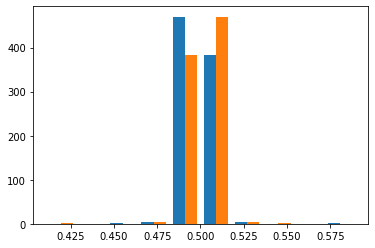

In [30]:
plt.hist(pred_proba);

# Reading in NAICS data to get number of establishments

In [31]:
naics = pd.read_csv("./Data/naics.csv")

In [32]:
naics = naics[['Id2', "Number of establishments"]]

In [33]:
naics = naics.set_index("Id2")

In [34]:
w_n_est = df.merge(naics, left_index = True, right_index = True)

In [35]:
w_n_est

,price,mean_commute_time,median_home_value,percent_bachelors_or_higher,percent_below_poverty,percent_highschool_or_higher,percent_no_health_insurance,rating,review_count,unemployment_rate,...,price_weight_contr,price_weight_contrv2,zip_code,high_price,4_star,1_star,zip_code.1,inc_cat2,inc_cat3,Number of establishments
501,1.708333,24.6,180900.0,44.9,4.9,93.5,4.1,3.433333,27.758333,4.7,...,0.424514,1.417855,15108,4,1,40,15108,3,2,2
1001,2.000000,25.4,473300.0,60.1,5.9,98.5,5.0,4.000000,17.000000,4.8,...,0.440158,2.589164,32082,0,0,0,32082,4,2,472
1002,2.000000,29.7,263900.0,42.2,0.7,92.9,7.4,4.500000,71.000000,3.9,...,1.844582,2.598002,32092,0,0,0,32092,2,1,564
1003,1.726667,20.0,149100.0,31.9,12.0,86.1,16.1,3.770000,80.106667,5.0,...,1.728671,1.817153,32207,13,2,56,32207,1,1,21
1004,1.000000,25.9,60800.0,9.6,25.1,78.3,12.3,4.500000,54.000000,12.8,...,0.685743,1.269895,32209,0,0,1,32209,1,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3448,1.789474,18.0,261000.0,29.0,4.7,90.2,15.7,3.605263,54.263158,7.4,...,1.109616,1.832977,99508,0,0,4,99508,2,1,16
3449,1.917808,16.9,315600.0,32.5,10.2,93.1,12.5,3.479452,61.493151,5.0,...,1.815382,2.841930,99515,5,0,11,99515,4,2,40
3450,1.888889,17.1,304100.0,36.0,2.5,93.0,17.2,3.944444,52.444444,5.8,...,2.466728,4.504047,99517,0,0,1,99517,4,2,17
3451,1.800000,16.0,253200.0,29.3,1.0,93.8,17.2,3.542857,55.000000,3.9,...,3.208066,5.946685,99518,3,0,10,99518,3,2,55


In [36]:
x = w_n_est[['price_weight_contrv2', 'high_price', '4_star', 'price', 'rating', "Number of establishments", "1_star"]]
y = w_n_est["inc_cat3"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 13)

for model in models:
    model_fit_score(model)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), train_score: 0.5822021116138764, test_score: 0.583710407239819
model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), train_score: 0.698340874811463, test_score: 0.4796380090497738
model: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False), train_score: 0.9547511312217195, test_score: 0.5339366515837104
model: DecisionTreeClassifier(cl

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Try with Affluence Score as Target

In [37]:
aff = pd.read_csv("./Data/affluence.csv")

In [38]:
aff = aff.groupby("zip_code").mean()

In [39]:
aff

,affluence
zip_code,
1069,8
1201,4
1220,1
1247,1
1373,27
...,...
99515,24
99517,24
99518,18


In [40]:
aff.describe()

,affluence
count,3454.000000
mean,20.375507
std,19.783113
min,1.000000
25%,4.000000
50%,12.000000
75%,32.000000
max,64.000000


In [43]:
#split affluence into two categories
def map_aff(x):
    if x <=12:
        return 1
    else:
        return 2

In [88]:
w_aff = df.merge(aff, on = "zip_code")

In [89]:
w_aff["aff_cat"] = w_aff['affluence'].apply(map_aff)

In [90]:
w_aff = w_aff[['price_weight_contrv2', 'high_price', '4_star', 'price', 'rating', "aff_cat", "1_star", "zip_code.1", 'affluence']]

In [91]:
w_aff

,price_weight_contrv2,high_price,4_star,price,rating,aff_cat,1_star,zip_code.1,affluence
0,15.520809,1,0,3.00000,4.500000,1,0,1069,8
1,2.409936,1,0,2.50000,4.250000,1,0,1201,4
2,2.409936,1,0,2.50000,4.250000,1,0,1201,4
3,7.461323,0,0,1.50000,4.250000,1,2,1220,1
4,7.461323,0,0,1.50000,4.250000,1,2,1220,1
...,...,...,...,...,...,...,...,...,...
95002,5.133926,13,0,1.90099,3.762376,1,23,99901,9
95003,5.133926,13,0,1.90099,3.762376,1,23,99901,9
95004,5.133926,13,0,1.90099,3.762376,1,23,99901,9
95005,5.133926,13,0,1.90099,3.762376,1,23,99901,9


In [92]:
w_aff.to_csv("./Data/final_with_affluence.csv", index = False)

In [49]:
x = w_aff[['price_weight_contrv2', 'high_price', '4_star', 'price', 'rating', "1_star"]]
y = w_aff["aff_cat"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 13)

for model in models:
    model_fit_score(model)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), train_score: 0.640926640926641, test_score: 0.6238425925925926
model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), train_score: 0.7332046332046332, test_score: 0.5740740740740741
model: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False), train_score: 0.7, test_score: 0.6006944444444444
model: DecisionTreeClassifier(class_weight=Non

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Gridsearch

In [50]:
rf = RandomForestClassifier()
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid,
                          cv = 3, n_jobs = -1)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [51]:
grid_search.best_score_

0.6521235521235521

In [52]:
param_grid = {
    'n_estimators': [50, 75, 100, 200]
}

grid_search = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = param_grid,
                          cv = 3, n_jobs = -1)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': [50, 75, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [53]:
grid_search.best_score_

0.6525096525096525

In [54]:
grid_search.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [55]:
#best score so far Adaboost with 2 categories affluence score, 65.5% with 50 estimators

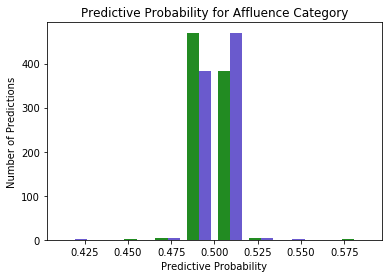

In [56]:
preds = ada.predict(x_test)

pred_proba = ada.predict_proba(x_test)

plt.title("Predictive Probability for Affluence Category")
plt.xlabel("Predictive Probability")
plt.ylabel("Number of Predictions")
plt.hist(pred_proba, color = ["forestgreen", "slateblue"], bins = 10);

In [68]:
corr = w_aff.corr()
corr = corr['aff_cat'].sort_values(ascending = False)

In [69]:
corr = pd.DataFrame (corr)
corr = corr.drop("aff_cat", axis = 0)
corr

,aff_cat
price,0.229972
rating,0.140392
high_price,0.063737
price_weight_contrv2,0.037239
4_star,0.035005
1_star,-0.140245


In [59]:
import seaborn as sns

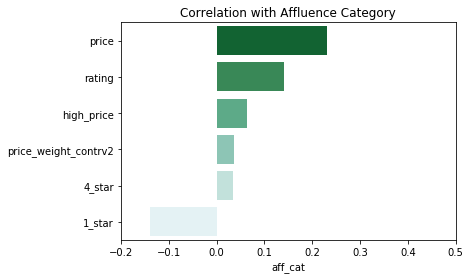

In [70]:
plt.title("Correlation with Affluence Category")
plt.xlim(-.2, .5)

sns.barplot(corr['aff_cat'], corr.index, palette = "BuGn_r" );

## Bring in un-aggregated dataframe for visualizations

In [61]:
old = pd.read_csv("./Data/final_not_aggregated.csv")

In [62]:
aff = pd.read_csv("./Data/affluence.csv")

In [63]:
aff['affluence_category'] = aff['affluence'].apply(map_aff)

In [64]:
old = old.merge(aff, left_index = True, right_index = True)

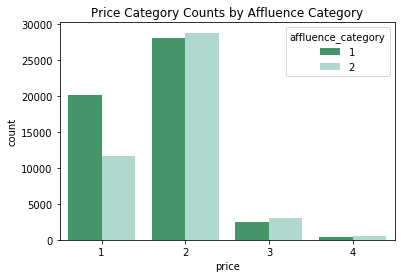

In [65]:
plt.title("Price Category Counts by Affluence Category")

sns.countplot(x="price", hue="affluence_category", data=old, palette = "BuGn_r");